<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [18]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [19]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


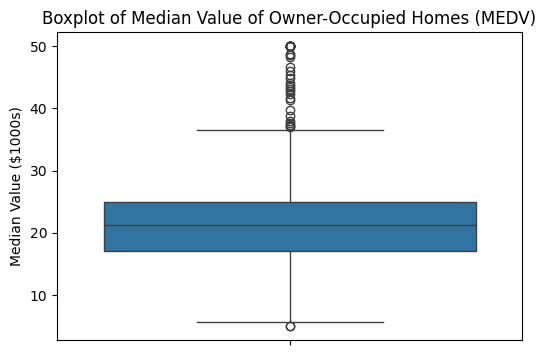

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.show()

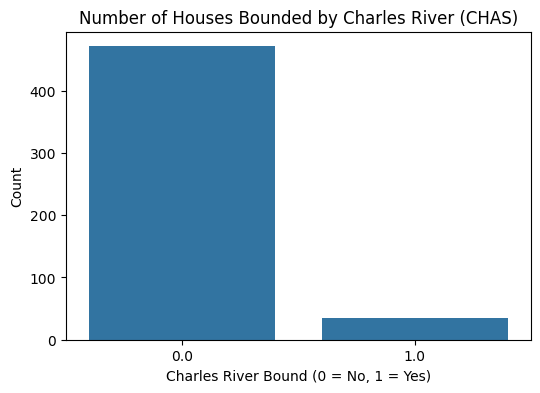

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Number of Houses Bounded by Charles River (CHAS)')
plt.xlabel('Charles River Bound (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


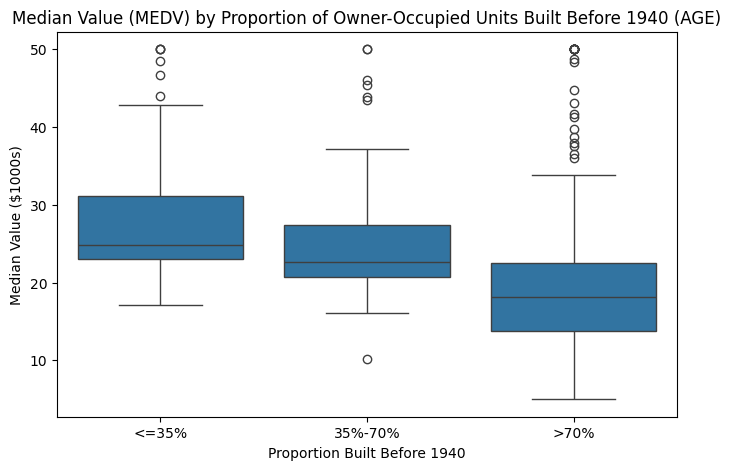

In [30]:
bins = [0, 35, 70, 100]
labels = ['<=35%', '35%-70%', '>70%']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Median Value (MEDV) by Proportion of Owner-Occupied Units Built Before 1940 (AGE)')
plt.xlabel('Proportion Built Before 1940')
plt.ylabel('Median Value ($1000s)')
plt.show()

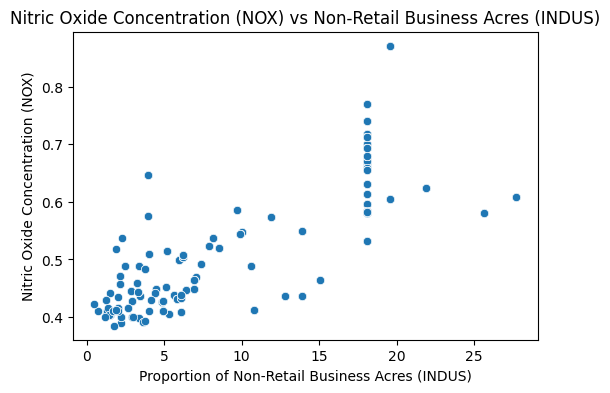

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric Oxide Concentration (NOX) vs Non-Retail Business Acres (INDUS)')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

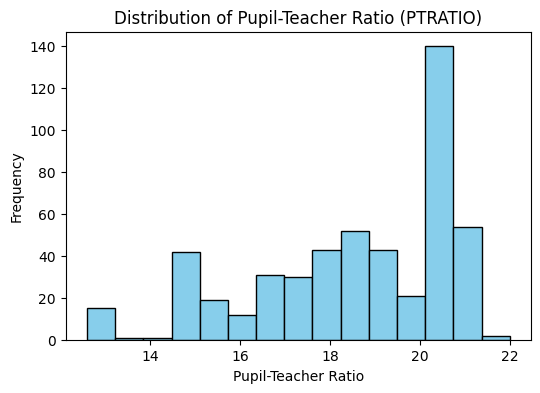

In [24]:
plt.figure(figsize=(6,4))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [25]:
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_val = scipy.stats.ttest_ind(medv_chas0, medv_chas1, equal_var=False)
print("T-test for MEDV difference by Charles River bounding:")
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print("Conclusion: Reject null hypothesis. There is a significant difference in MEDV between houses bounded by the Charles River or not.")
else:
    print("Conclusion: Fail to reject null hypothesis. No significant difference in MEDV between groups.")

T-test for MEDV difference by Charles River bounding:
T-statistic = -3.113, p-value = 0.004
Conclusion: Reject null hypothesis. There is a significant difference in MEDV between houses bounded by the Charles River or not.


In [26]:
group1 = boston_df[boston_df['AGE_group'] == '<=35%']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35%-70%']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '>70%']['MEDV']

f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)
print("\nANOVA test for MEDV difference across AGE groups:")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print("Conclusion: Reject null hypothesis. At least one AGE group has significantly different MEDV.")
else:
    print("Conclusion: Fail to reject null hypothesis. No significant difference in MEDV across AGE groups.")

<ipython-input-26-a55ffdd2a756>:5: DegenerateDataWarning: at least one input has length 0
  f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)



ANOVA test for MEDV difference across AGE groups:
F-statistic = nan, p-value = nan
Conclusion: Fail to reject null hypothesis. No significant difference in MEDV across AGE groups.


In [27]:
corr, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"\nPearson correlation between NOX and INDUS:")
print(f"Correlation coefficient = {corr:.3f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print("Conclusion: Reject null hypothesis. Significant correlation between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject null hypothesis. No significant correlation.")


Pearson correlation between NOX and INDUS:
Correlation coefficient = 0.764, p-value = 0.000
Conclusion: Reject null hypothesis. Significant correlation between NOX and INDUS.


In [28]:
X = sm.add_constant(boston_df['DIS'])  # add intercept
model = sm.OLS(boston_df['MEDV'], X).fit()
print("\nLinear Regression Results for MEDV ~ DIS:")
print(model.summary())


Linear Regression Results for MEDV ~ DIS:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        18:44:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [29]:
if model.pvalues['DIS'] < 0.05:
    print("Conclusion: Distance to employment centers significantly impacts median house value.")
else:
    print("Conclusion: Distance to employment centers does not significantly impact median house value.")

Conclusion: Distance to employment centers significantly impacts median house value.
